In [ ]:
from pprint import pprint

alphabet_num = {}
alphabet = 'a b c d e f g h i j k l m n o p q r s t u v w x y z . , '.split(' ')
base_freq = 262 #hz
note_freqs = {}
note_freqs['a'] = 440
note_freqs['b'] = 493
note_freqs['c'] = 262
note_freqs['d'] = 293
note_freqs['e'] = 329
note_freqs['f'] = 349
note_freqs['g'] = 392
note_freqs['h'] = 277
note_freqs['i'] = 311
note_freqs['j'] = 369
note_freqs['k'] = 415
note_freqs['l'] = 466

for i in range(11, len(alphabet)):
    note_freqs[alphabet[i]] = 0

In [ ]:
poet = 'The Road Not Taken by Robert Frost Two roads diverged in a yellow wood And sorry I could not travel both And be one traveler, long I stood And looked down one as far as I could To where it bent in the undergrowth Then took the other, as just as fair And having perhaps the better claim, Because it was grassy and wanted wear Though as for that, the passing there Had worn them really about the same,'
poet = poet.lower().split(" ")

In [ ]:
def get_freq(ls):
    for i in ls:
        freqs.append(note_freqs[i])
    return freqs

In [ ]:
music_notes = [[] for _ in range(len(poet))]
for idx, word in enumerate(poet):
    for letter in word:
        music_notes[idx].append(letter)
music_notes

[['t', 'h', 'e'],
 ['r', 'o', 'a', 'd'],
 ['n', 'o', 't'],
 ['t', 'a', 'k', 'e', 'n'],
 ['b', 'y'],
 ['r', 'o', 'b', 'e', 'r', 't'],
 ['f', 'r', 'o', 's', 't'],
 ['t', 'w', 'o'],
 ['r', 'o', 'a', 'd', 's'],
 ['d', 'i', 'v', 'e', 'r', 'g', 'e', 'd'],
 ['i', 'n'],
 ['a'],
 ['y', 'e', 'l', 'l', 'o', 'w'],
 ['w', 'o', 'o', 'd'],
 ['a', 'n', 'd'],
 ['s', 'o', 'r', 'r', 'y'],
 ['i'],
 ['c', 'o', 'u', 'l', 'd'],
 ['n', 'o', 't'],
 ['t', 'r', 'a', 'v', 'e', 'l'],
 ['b', 'o', 't', 'h'],
 ['a', 'n', 'd'],
 ['b', 'e'],
 ['o', 'n', 'e'],
 ['t', 'r', 'a', 'v', 'e', 'l', 'e', 'r', ','],
 ['l', 'o', 'n', 'g'],
 ['i'],
 ['s', 't', 'o', 'o', 'd'],
 ['a', 'n', 'd'],
 ['l', 'o', 'o', 'k', 'e', 'd'],
 ['d', 'o', 'w', 'n'],
 ['o', 'n', 'e'],
 ['a', 's'],
 ['f', 'a', 'r'],
 ['a', 's'],
 ['i'],
 ['c', 'o', 'u', 'l', 'd'],
 ['t', 'o'],
 ['w', 'h', 'e', 'r', 'e'],
 ['i', 't'],
 ['b', 'e', 'n', 't'],
 ['i', 'n'],
 ['t', 'h', 'e'],
 ['u', 'n', 'd', 'e', 'r', 'g', 'r', 'o', 'w', 't', 'h'],
 ['t', 'h', 'e', 'n'],


In [ ]:
import numpy as np
from scipy.io.wavfile import write
from scipy import signal
import os

samplerate = 44100 #Frequecy in Hz

def get_cubicwave(chords, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    # wave = amplitude * (np.sin(2 * np.pi * freq * t) + np.cos(2 * np.pi * freq * t))
    # wave = signal.sawtooth(np.sin(2 * np.pi * freq * t))
    wave = 0
    for i in chords:
        wave += amplitude * (np.sin(2 * np.pi * i * t) + (np.sin(6 * np.pi * i * t)/3) +
                            (np.sin(10 * np.pi * i * t)/5))

    return wave

In [111]:
freqs = [[] for _ in range(len(music_notes))]
for idx, values in enumerate(music_notes):
    for value in values: 
        freqs[idx].append(note_freqs[value])

In [112]:
dura = [[0.5] if len(note)<=3 else [1] for note in music_notes]
dura = np.array(dura)

In [113]:
def get_song_data(music_notes, dura):
    
    song = []
    for i, note in enumerate(music_notes):
        song.append(get_cubicwave(note, duration=dura[i]))
    song = np.concatenate(song)
    return song

data = get_song_data(freqs, dura)
data = data * (16300/np.max(data))

In [114]:
write('poet.wav', samplerate, data.astype(np.int16))
# play wav file
os.system("poet.wav")

0

C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


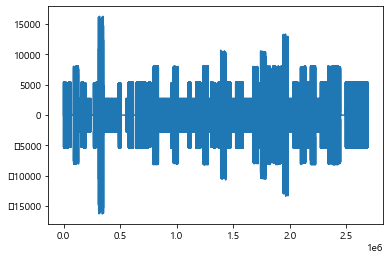

In [115]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()